## Multilabel Classification 
In this example, we use `MultiOutputClassifier` for multilabel classification. This consists of fitting one classifier per target. 

1. Load the data

We use the yeast dataset which contains 2417 datapoints each with 103 features and 14 possible labels. Each data point has at least one label.

In [134]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
X, y = fetch_openml("yeast", version=4, return_X_y=True)
y = y == "TRUE"
print(X.shape, X)
print(y.shape, y)

# Get the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(2417, 103)           Att1      Att2      Att3  ...    Att101    Att102    Att103
0     0.004168 -0.170975 -0.156748  ... -0.018312  0.030126  0.124722
1    -0.103956  0.011879 -0.098986  ... -0.041471 -0.079758  0.017161
2     0.509949  0.401709  0.293799  ...  0.026710 -0.066565 -0.122352
3     0.119092  0.004412 -0.002262  ... -0.089227 -0.049913 -0.043893
4     0.042037  0.007054 -0.069483  ... -0.061539 -0.035160  0.067834
...        ...       ...       ...  ...       ...       ...       ...
2412 -0.119784  0.001259 -0.123645  ... -0.081132 -0.065844  0.001267
2413  0.085327  0.058590  0.085268  ... -0.040026  0.342176 -0.169668
2414  0.082526 -0.095571 -0.022019  ... -0.066957  0.260121 -0.125303
2415 -0.130830  0.008868 -0.009457  ... -0.122332 -0.022453  0.001953
2416 -0.171578 -0.066536  0.168206  ... -0.083342 -0.063135  0.018810

[2417 rows x 103 columns]
(2417, 14)       Class1  Class2  Class3  Class4  ...  Class11  Class12  Class13  Class14
0      False   False   False   F

2. Train the classifier

We first train a logistic regression classifier for each of the 14 labels, then use `MultiOutputClassifier` to train the classifier with training set.

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


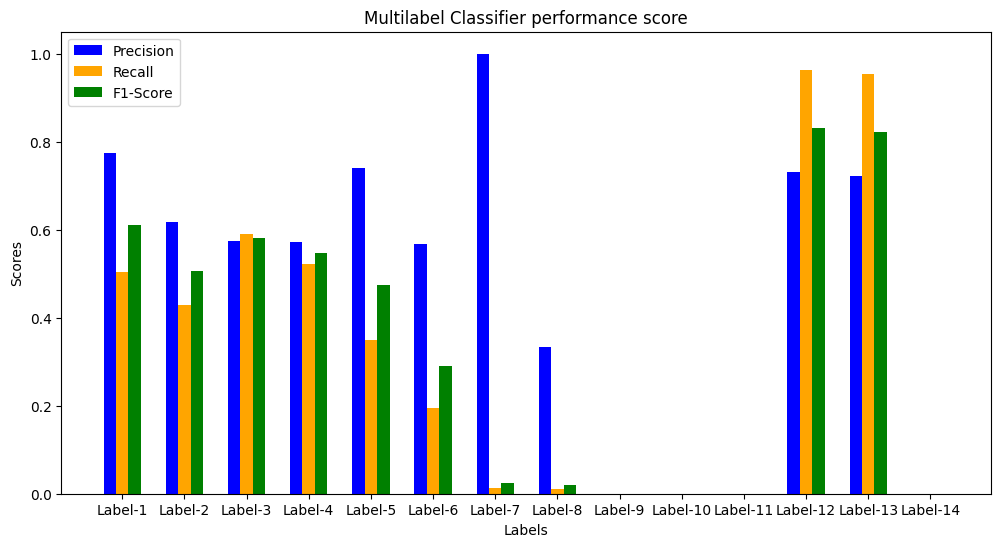

In [135]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the classifier
multilabel_clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)
y_pred = multilabel_clf.predict(X_test)

# Calculate precision, recall and F1 score for each label
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
#print("Precision score: {:.3}".format(precision))
#print("Recall score: {:.3}".format(recall))
#print("F1 score: {:.3}".format(f1))

# Plot metrics
labels = [f"Label-{i+1}" for i in range(y.shape[1])]
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x-0.2, precision, 0.2, label="Precision", color='blue')
ax.bar(x, recall, 0.2, label="Recall", color='orange')
ax.bar(x+0.2, f1, 0.2, label="F1-Score", color='green')
ax.set_xlabel("Labels")
ax.set_ylabel("Scores")
ax.set_title("Multilabel Classifier performance score")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


3. Plot the Hamming score based on labels

14


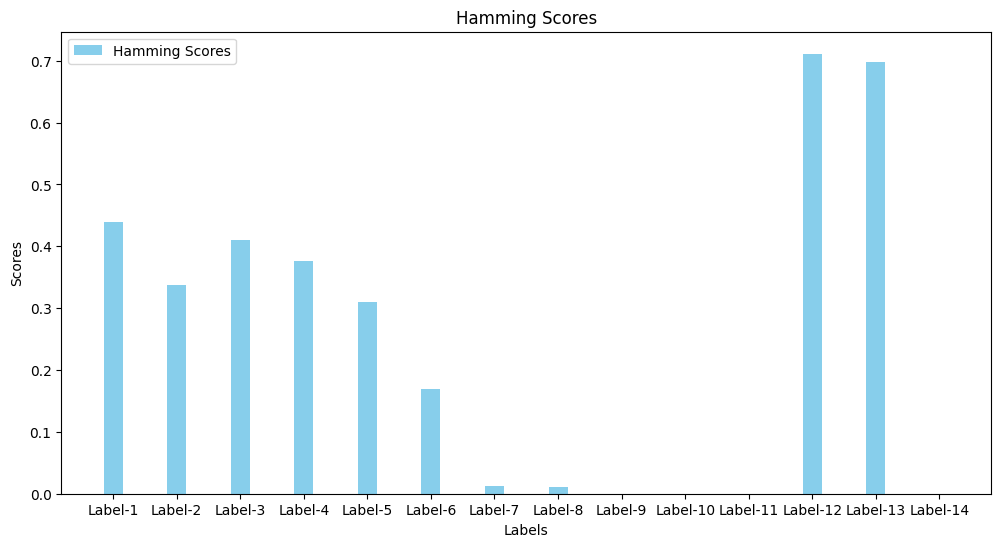

In [136]:
# Import library 
import seaborn as sns 
from sklearn.metrics import hamming_loss

# Calculate hamming score list
def hamming_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    acc_list = []
    for i in range(y_true.shape[1]):
        intersection = sum(np.logical_and(y_true[:,i], y_pred[:,i]))
        union = sum(np.logical_or(y_true[:,i], y_pred[:,i]))
        accuracy = float(intersection / union)
        acc_list.append(accuracy)
    return acc_list

# Plot the hamming score based on labels
y_acc = hamming_score(y_test, y_pred)
print(len(y_acc))

plt.figure(figsize=(12, 6))
plt.bar(x, y_acc, 0.3, label="Hamming Scores", color='skyblue')
plt.xticks(x, labels=labels)

plt.xlabel("Labels")
plt.ylabel("Scores")
plt.title("Hamming Scores")
plt.legend()

plt.show()